# Pattern Recognition Assignment 4.

## Μωράτης Κωνσταντίνος, 9589.

In [319]:
!pip install keras
!pip install tensorflow

Check for missing values
0    0
1    0
2    0
dtype: int64


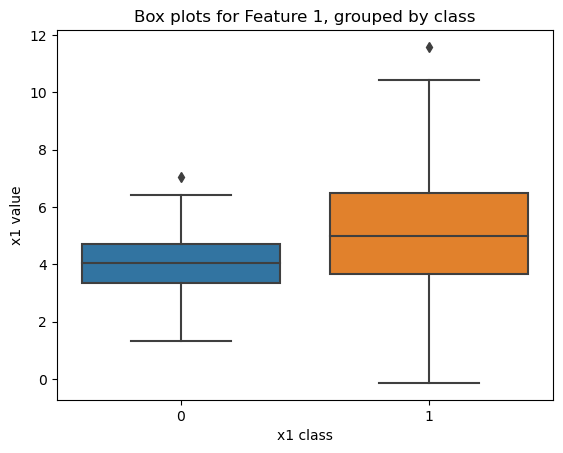

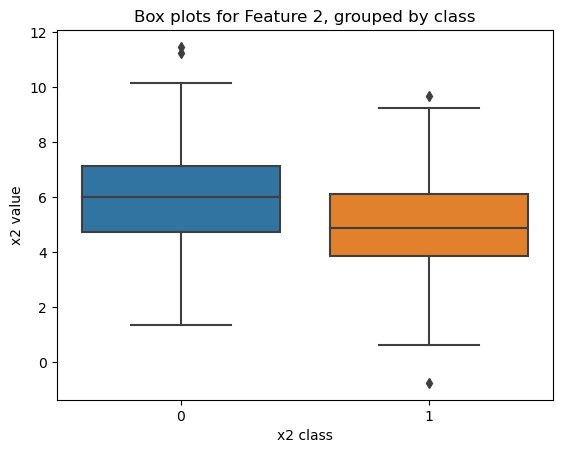

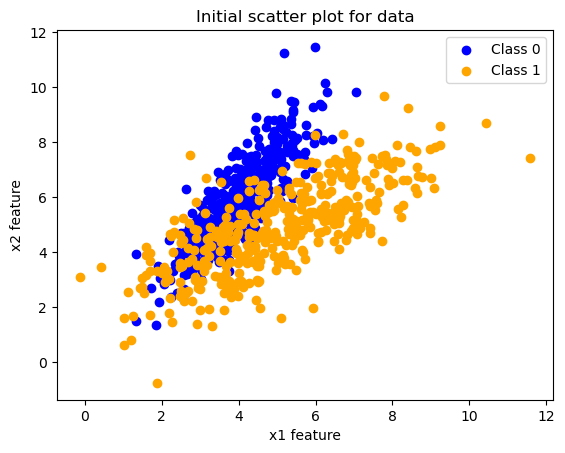

In [320]:
# Reading data from csv file and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset.csv', header = None)
class0_data = df[df[2] == 0].to_numpy()
class1_data = df[df[2] == 1].to_numpy()

# Checking for missing values
print("Check for missing values")
print(df.isnull().sum()) 

# Create box plots for feature1, grouped by class to check data distribution and outliers
plt.figure(1)
sns.boxplot(x=2, y=0, data=df)
plt.xlabel("x1 class")
plt.ylabel("x1 value")
plt.title("Box plots for Feature 1, grouped by class")

# Create box plots for feature2, grouped by class to check data distribution and outliers
plt.figure(2)
sns.boxplot(x=2, y=1, data=df)
plt.xlabel("x2 class")
plt.ylabel("x2 value")
plt.title("Box plots for Feature 2, grouped by class")

# Creating a scatter plot for data visualization
plt.figure(3)
plt.scatter(class0_data[:,0], class0_data[:,1], color='blue', label='Class 0')
plt.scatter(class1_data[:,0], class1_data[:,1], color='orange', label='Class 1')
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.title("Initial scatter plot for data")
plt.legend()


plt.show()


In [348]:
# Create a function to split data to train set and validation set
# Also it performs MinMaxScalling to the X data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def splitDataset(df):
    X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:,0:1], df.loc[:,2], 
                                                    test_size=0.2, 
                                                    shuffle=True)
    y_train = y_train.to_numpy()
    y_valid = y_valid.to_numpy()
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    return X_train, X_valid, y_train, y_valid
    

X_train, X_valid, y_train, y_valid = splitDataset(df)
print(X_train)

[[0.07002918 0.1685564 ]
 [0.20034863 0.30618907]
 [0.37361626 0.35132589]
 ...
 [0.40650476 0.20112242]
 [0.44552444 0.44898723]
 [0.35137477 0.45807096]]


In [322]:
# Implementing different classsification models and calculating metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Create a function that trains different machine learning models
def train_models(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    # Multinomial Naive Bayes
    models['Multinomial NB'] = MultinomialNB()
    
    models['Gaussian NB'] = GaussianNB()
    
    models['Decision Trees'] = DecisionTreeClassifier()
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
      
        # Fit the classifier
        models[key].fit(input_X_train, input_y_train)
      
        # Make predictions
        predictions = models[key].predict(input_X_test)
      
        # Calculate metrics
        accuracy[key] = metrics.accuracy_score(predictions, input_y_test)
        precision[key] = metrics.precision_score(predictions, input_y_test)
        recall[key] = metrics.recall_score(predictions, input_y_test)
        f1[key] = metrics.f1_score(predictions, input_y_test)

    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()
    df_model['F1'] = f1.values()

    df_model = df_model.round(4) * 100

    display(df_model)
    ax = df_model.plot.bar(rot=60)
    ax.legend(
        ncol=len(models.keys()), 
        bbox_to_anchor=(0, 1), 
        loc='lower left', 
        prop={'size': 12}
    )
    plt.tight_layout()

    return df_model


 --- Current model: Multinomial NB  ---


 --- Current model: Gaussian NB  ---


 --- Current model: Decision Trees  ---



,Accuracy,Precision,Recall,F1
Multinomial NB,75.00,88.46,69.00,77.53
Gaussian NB,80.00,76.92,81.08,78.95
Decision Trees,75.62,82.05,71.91,76.65


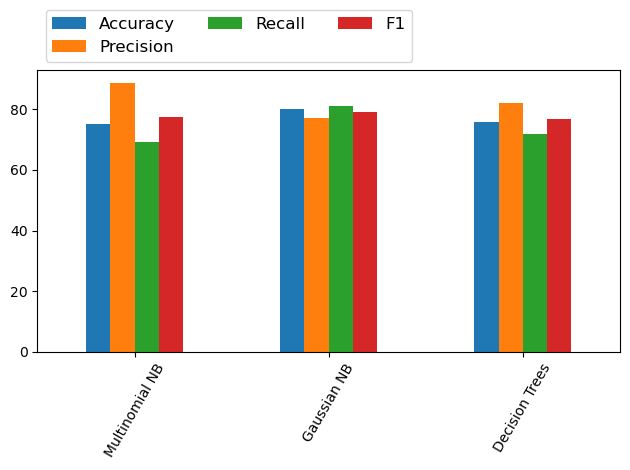

In [323]:
# Train models 
CV_results = train_models(X_train, y_train, X_valid, y_valid)

In [324]:
# Create a function that trains different machine learning models with cross validation
from sklearn.model_selection import cross_validate
import statistics

def train_models_cv(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    # Multinomial Naive Bayes
    models['Multinomial NB'] = MultinomialNB()
    
    models['Gaussian NB'] = GaussianNB()
    
    models['Decision Trees'] = DecisionTreeClassifier()
    
    cv_results = {}
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        cv_results[key] = cross_validate(models[key], 
                                         X_train, 
                                         y_train, 
                                         cv=10
                                        )
        
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
        print("Mean score from 10 cross validation trainings:")
        display(statistics.mean(cv_results[key]['test_score']))


In [325]:
# Train models with cv
CV_results = train_models_cv(X_train, y_train, X_valid, y_valid)


 --- Current model: Multinomial NB  ---

Mean score from 10 cross validation trainings:


0.7671875


 --- Current model: Gaussian NB  ---

Mean score from 10 cross validation trainings:


0.790625


 --- Current model: Decision Trees  ---

Mean score from 10 cross validation trainings:


0.778125

In [350]:
import numpy as np
import keras

# define the model
n_epochs = 100
model = keras.Sequential()
model.add(keras.layers.Dense(units=1024, activation='relu', input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data, using cross validation
for epoch in range(n_epochs):
    X_train, X_valid, y_train, y_valid = splitDataset(df)
    model.fit(X_train, y_train, epochs=1, batch_size=32)
    model.save('model_{}.h5'.format(epoch))
    
# finding epoch that gave the model with best accuracy
best_model = None
best_accuracy = 0

for epoch in range(n_epochs):
    model = keras.models.load_model('model_{}.h5'.format(epoch))
    loss, accuracy = model.evaluate(X_train, y_train)
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

print('Best accuracy: (on training data)', best_accuracy)

# evaluate the best model found on the validation data
print("\n Valuating the model in the validation data")
loss, accuracy = best_model.evaluate(X_valid, y_valid)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

20/20 [==============================] - 0s 17ms/step - loss: 0.3562 - accuracy: 0.8125


20/20 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8547


20/20 [==============================] - 0s 7ms/step - loss: 0.3057 - accuracy: 0.8594
Best accuracy: (on training data) 0.859375

 Valuating the model in the validation data
5/5 [==============================] - 0s 8ms/step - loss: 0.3474 - accuracy: 0.8250
Test loss: 0.3474142551422119
Test accuracy: 0.824999988079071
